<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/identification/species/RO1_SO1_REIMS_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REIMS Visualization

Mount the google drive where the closed-source dataset is safely and privately stored.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive')

Mounted at /content/drive


['Colab Notebooks',
 'University',
 'AI',
 'profile.jpg',
 'personal',
 'ass3_example_solutions_marking_guides_2023_V2.docx',
 'JAPA101: Handwriting Assignment - Part 2 - Creative Writing and Reflection.gdoc']

## Load the data

To load an xlsx file into memory using Python, you can use the pandas library. The pandas library provides a read_excel() function that can be used to read an xlsx file into a DataFrame object.

This code will join the strings in the path_array variable and print the resulting joined path. The output will be /usr/local/bin.

Note that the * operator is used to unpack the path_array variable so that each element in the array is passed as a separate argument to the os.path.join() function. This allows the function to join the strings in the array together to form a valid path.

To convert the feature names (column names) of a Pandas DataFrame to strings, you can use the DataFrame.columns.astype(str) method. This will convert the column names to strings and return a new index object.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

path = ['drive', 'MyDrive', 'AI', 'fish', 'REIMS_data.xlsx']
path = os.path.join(*path)

# Load the dataset
data = pd.read_excel(path)

# Statistical Methods


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

class SimpleMSClassifier:
    def __init__(self, bin_size=50):
        self.avg_intensities = {}
        self.bin_size = bin_size

    def _bin_data(self, X):
        """ Bin the data in groups of 'bin_size' m/z ratios. """
        return X.groupby(np.arange(len(X.columns)) // self.bin_size, axis=1).mean()

    def fit(self, X, y):
        """ Learn the average intensities for each bin from the training data. """
        X_binned = self._bin_data(X)
        for label in y.unique():
            self.avg_intensities[label] = X_binned[y == label].mean()

    def predict(self, X):
        """ Classify new samples based on the scoring system for each bin. """
        X_binned = self._bin_data(X)
        predictions = []
        for _, sample in X_binned.iterrows():
            scores = {}
            for label, avg_intensities in self.avg_intensities.items():
                score = sum([-1 if sample[binned_mz] > avg_intensities[binned_mz] else 0
                             for binned_mz in avg_intensities.index])
                scores[label] = score
            predictions.append(max(scores, key=scores.get))
        return predictions

# Example usage
data = pd.read_excel(path)
data = data[~data['m/z'].str.contains('HM')]
data = data[~data['m/z'].str.contains('QC')]
X = data.drop('m/z', axis=1)
y = data['m/z'].apply(lambda x: 0 if 'H' in x else 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and fit the classifier
classifier = SimpleMSClassifier(bin_size=50)
classifier.fit(X_train, y_train)

# Predict on both training and testing sets
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

# Calculate accuracies
train_accuracy = balanced_accuracy_score(y_train, train_predictions)
test_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Displaying results in a table
results_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy]
})

print(results_table)

    Dataset  Accuracy
0  Training  0.577532
1   Testing  0.583333


# Visualization

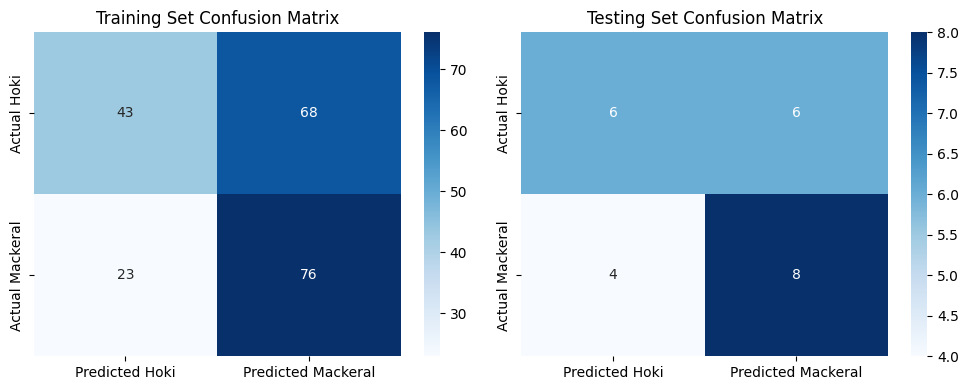

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_train=None, y_train_pred=None, y_test =None, y_test_pred=None):
    # Generate confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Plotting the confusion matrix for the training set
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)

    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Hoki', 'Predicted Mackeral'],
                yticklabels=['Actual Hoki', 'Actual Mackeral'])
    plt.title('Training Set Confusion Matrix')

    if y_test is not None:
        # Generate confusion matrice
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        # Plotting the confusion matrix for the testing set
        plt.subplot(1, 2, 2)
        sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Hoki', 'Predicted Mackeral'],
                    yticklabels=['Actual Hoki', 'Actual Mackeral'])
        plt.title('Testing Set Confusion Matrix')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_train=y_train, y_train_pred=train_predictions,
                      y_test=y_test, y_test_pred=test_predictions)

# Classification - Traditional Machine Learning Techniques

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Example usage
data = pd.read_excel(path)
data = data[~data['m/z'].str.contains('HM')]
data = data[~data['m/z'].str.contains('QC')]
X = data.drop('m/z', axis=1)
y = data['m/z'].apply(lambda x: 0 if 'H' in x else 1)

# Prepare the data
data = data[~data['m/z'].str.contains('HM')]
X = data.drop('m/z', axis=1)  # Features (intensities)
y = data['m/z'].apply(lambda x: 0 if 'H' in x else 1)  # Labels (0 for Hoki, 1 for Moki)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "SimpleMSClassifier": SimpleMSClassifier(bin_size=50),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Implementing 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {name: [] for name in classifiers}

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, clf in classifiers.items():
        # Training
        clf.fit(X_train, y_train)
        # Predicting
        predictions = clf.predict(X_test)
        # Evaluating
        balanced_acc = balanced_accuracy_score(y_test, predictions)
        results[name].append(balanced_acc)

# Calculating average balanced accuracy
avg_results = {name: np.mean(acc) for name, acc in results.items()}

# Displaying results in a table
results_df = pd.DataFrame(list(avg_results.items()), columns=['Classifier', 'Average Balanced Accuracy'])
print(results_df)

            Classifier  Average Balanced Accuracy
0   SimpleMSClassifier                   0.578040
1  Logistic Regression                   0.990909
2                  SVM                   0.974576
3        Random Forest                   0.982742
4                  KNN                   0.941016
5        Decision Tree                   0.996000


# CNN

[INFO] Reading the dataset.
[INFO] Pre-processing the dataset.
[INFO] Initializing the LeNet model
[INFO] Training the network
[INFO] EPOCH: 1/100
Train loss: 48.514534, Train accuracy: 0.4800
Val loss: 7.794328, Val accuracy: 0.4717

[INFO] EPOCH: 2/100
Train loss: 22.351662, Train accuracy: 0.4971
Val loss: 2.853667, Val accuracy: 0.3019

[INFO] EPOCH: 3/100
Train loss: 15.066071, Train accuracy: 0.5257
Val loss: 3.873842, Val accuracy: 0.3585

[INFO] EPOCH: 4/100
Train loss: 17.421780, Train accuracy: 0.4743
Val loss: 2.579970, Val accuracy: 0.3208

[INFO] EPOCH: 5/100
Train loss: 11.991690, Train accuracy: 0.4400
Val loss: 1.646102, Val accuracy: 0.3774

[INFO] EPOCH: 6/100
Train loss: 11.272718, Train accuracy: 0.4343
Val loss: 0.733447, Val accuracy: 0.3585

[INFO] EPOCH: 7/100
Train loss: 4.665016, Train accuracy: 0.4971
Val loss: 0.343124, Val accuracy: 0.4528

[INFO] EPOCH: 8/100
Train loss: 5.800307, Train accuracy: 0.4571
Val loss: 0.690426, Val accuracy: 0.4151

[INFO] EPOC

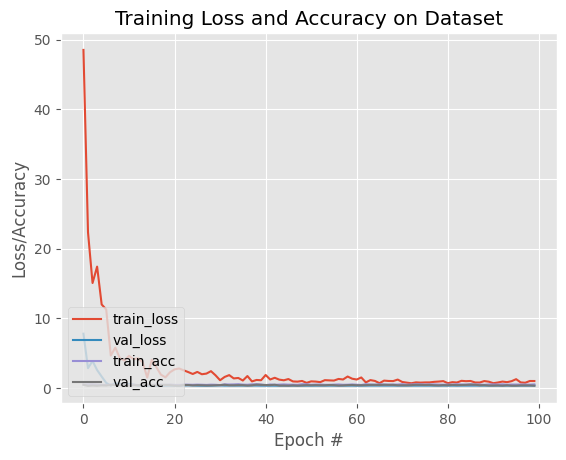

In [107]:
import torch
import torch.nn
from torch.nn import Module, Conv1d, Linear, MaxPool1d, Dropout, ReLU, LogSoftmax, CrossEntropyLoss
from torch import flatten
from torch.optim import Adam
from torch import nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import argparse
import time


class LeNet(Module):


    def __init__(self, shape):
        """
        A simple convolutional neural network, based on LeNet from (LeCun 1989)

        Args:
            shape (np-like): the architecture for the CNN.
            for
                (input, hidden, output) = shape
            where
                input - number of features.
                hidden - dimensions for hidden layer(s).
                output - number of classes.

        References:
        1. LeCun, Y. (1989). Generalization and network design strategies.
            Connectionism in perspective, 19(143-155), 18.
        2. LeCun, Y., Boser, B., Denker, J., Henderson, D., Howard,
            R., Hubbard, W., & Jackel, L. (1989).
            Handwritten digit recognition with a back-propagation network.
            Advances in neural information processing systems, 2.
        3. LeCun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E.,
            Hubbard, W., & Jackel, L. D. (1989).
            Backpropagation applied to handwritten zip code recognition.
            Neural computation, 1(4), 541-551.
        """
        super(LeNet, self).__init__()
        self.shape = shape
        (input, hidden, output) = shape

        # First convolutional layer
        self.conv1 = Conv1d(in_channels=input, out_channels=hidden[0], kernel_size=5)
        self.relu1 = ReLU()
        self.maxpool1 = MaxPool1d(kernel_size=(2), stride=(2))
        self.dropout1 = Dropout(p=0.5)

        # Second convolutional layer
        self.conv2 = Conv1d(in_channels=hidden[0], out_channels=hidden[1], kernel_size=5)
        self.relu2 = ReLU()
        self.maxpool2 = MaxPool1d(kernel_size=(2), stride=2)
        self.dropout2 = Dropout(p=0.5)

        # Fully connected layers
        self.flatten = lambda x: flatten(x, 1)
        self.fc1 = Linear(in_features=hidden[2], out_features=hidden[3])
        self.relu3 = ReLU()

        # Output layer.
        self.fc2 = Linear(in_features=hidden[3], out_features=output)
        self.logSoftmax = LogSoftmax(dim=1)

        self.layers = layers = [
            self.conv1, self.relu1, self.maxpool1, # First layer
            self.dropout1, # Regularization
            self.conv2, self.relu2, self.maxpool2, # Second layer
            self.dropout2, # Regularization
            self.flatten,
            self.fc1, self.relu3, # Third layer
            self.fc2, self.logSoftmax # Fourth layer
        ]


    def forward(self, x):
        # Forward pass of the convolutional neural network.
        for layer in self.layers:
            x = layer(x)
        return x


# Hyperparameters
learning_rate = 1E-3
batch_size = 20
epochs = 100

# Evaluation parameters.
train_split = 0.75
val_split = 0.1
test_split = 1 - train_split - val_split
# print(f"[DEBUG] train_split, val_split, test_split: ({train_split},{val_split},{test_split})")

# Step 1: Load your dataset (replace this with your data loading code)
print("[INFO] Reading the dataset.")
data = pd.read_excel(path)

# Pre-process the dataset.
print("[INFO] Pre-processing the dataset.")
# Remove adept instances for harder objectives.
data = data[~data['m/z'].str.contains('HM')]
data = data[~data['m/z'].str.contains('QC')]
data = data[~data['m/z'].str.contains('HM')]
X = data.drop('m/z', axis=1) # X contains only the features.
y = data['m/z'].apply(lambda x: 0 if 'H' in x else 1)  # Labels (0 for Hoki, 1 for Moki)

# one-hot encoding where labels are [0,1] for Hoki, and [1,0] for Mackeral
def one_hot_encode(label, num_classes):
    one_hot = np.zeros(num_classes)
    one_hot[label] = 1
    return one_hot

# I am speed
y = np.array([one_hot_encode(label, 2) for label in y])
# y = y.reshape(1, -1)

# Step 2: Split your dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1-train_split), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_split, random_state=42)

assert len(X_train) == len(y_train), "Training dataset, x and y, should be the same length."
assert len(X_val) == len(y_val), "Validation dataset, x and y, should be the same length."
assert len(X_test) == len(y_test), "Test dataset, x and y, should be the same length."

# Step 3: Create custom PyTorch Dataset classes
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        sample = {'data': torch.Tensor(self.data.iloc[idx]), 'label': torch.Tensor([self.labels[idx]])}
        return sample

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

# Step 4: Create PyTorch DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# calculate steps per epoch for training and validation set
train_steps = len(train_loader.dataset) // batch_size
val_steps = len(val_loader.dataset) // batch_size

# Use GPUs if available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("[INFO] Initializing the LeNet model")

# "Conv1d are agnostic to the length of their input." - Stack Overflow
# https://stackoverflow.com/questions/64963473/pytorch-cnnruntimeerror-given-groups-1-weight-of-size-16-16-3-expected-i
input = batch_size # The number of channels for 1D mass spectrometry is 1.
output = 2
model = LeNet(
    shape = (
        input, # Input
         [10,20,252,500], #Hidden
        output) # Output
)

# print(f"[DEBUG] shape: {model.shape}")

model.to("cuda")

optimizer = Adam(model.parameters(), lr=learning_rate)
loss_function = CrossEntropyLoss()

H = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

print("[INFO] Training the network")
startTime = time.time()

# Training the CNN model.
for e in range(0, epochs):
    # Puts the model in train mode.
    model.train()

    total_train_loss = 0
    total_val_loss = 0

    train_correct = 0
    val_correct = 0

    # Training routine
    # Note: the benefit of using torch's DataLoader,
    # is that is automatically yields batches of training data.
    # This makes it ammeneable to training a deep neural network.
    for batch in train_loader:
        # print(f"[DEBUG] (x,y): ({x},{y})")
        (x,y) = batch["data"], batch["label"]
        (x,y) = (x.to(device), y.to(device))
        # Everything FUCKS out when the batch size isn't met
        if len(x) < 20:
            break
        prediction = model(x)
        loss = loss_function(prediction, y.squeeze(1))
        # 1. Zero out the gradients
        optimizer.zero_grad()
        # 2. Perform a backwards pass.
        loss.backward()
        # 3. Update the weights.
        optimizer.step()

        total_train_loss += loss
        train_correct += (prediction.argmax(1) == y.squeeze(1).argmax(1)).type(torch.float).sum().item()

    # Evalulation routine
    # no_grad() turns off gradient tracking and computation.
    with torch.no_grad():
        # Puts the model in evaluation mode.
        model.eval()
        for batch in val_loader:
            (x,y) = batch["data"], batch["label"]
            (x,y) = (x.to(device), y.to(device))
            if len(x) < 20:
                break
            prediction = model(x)
            total_val_loss = loss_function(prediction,y.squeeze(1))
            val_correct += (prediction.argmax(1) == y.squeeze(1).argmax(1)).type(torch.float).sum().item()

    # calculate the average training and validation loss
    avgTrainLoss = total_train_loss / train_steps
    avgValLoss = total_val_loss / val_steps
    # calculate the training and validation accuracy
    trainCorrect = train_correct / len(train_loader.dataset)
    valCorrect = val_correct / len(val_loader.dataset)
    # update our training history
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
    H["train_acc"].append(trainCorrect)
    H["val_loss"].append(avgValLoss.cpu().detach().numpy())
    H["val_acc"].append(valCorrect)
    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, epochs))
    print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
        avgTrainLoss, trainCorrect))
    print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
        avgValLoss, valCorrect))

# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("model_accuracy.png")
# serialize the model to disk
# torch.save(model, "model.h5")

In [118]:
# switch off autograd
with torch.no_grad():
    # loop over the test set
    for batch in test_loader:
        # grab the original image and ground truth label
        (x,y) = batch["data"], batch["label"]
        gtLabel = y
        # send the input to the device and make predictions on it
        image = x.to(device)
        pred = model(x)
        # find the class label index with the largest corresponding
        # probability
        idx = pred.argmax(axis=1).cpu().numpy()[0]
        predLabel = test_dataset.dataset.classes[idx]
        print("[INFO] ground truth label: {}, predicted label: {}".format(gtLabel, predLabel))
        break

RuntimeError: ignored